# Project 03: Building a Classifier (Titanic)
**Author:**  James Pinkston  
**Date:**  November 9, 2025  
**Objective:**  P3: Evaluate three classifiers using the Titantic dataset:  Decision Tree, Support Vector Machine, and Neural Network.

## Section 1. Import and Inspect the Data

Load the Titanic dataset directly from the seaborn library.


In [2]:
# All imports should be at the top of the notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load Titanic Dataset
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

Impute missing values for age using the median:

In [6]:
median_age = titanic['age'].median()
titanic['age'] = titanic['age'].fillna(median_age)

Fill in missing values for embark_town using the mode:

In [7]:
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

### 2.2 Feature Engineering

Create new features:

In [8]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use **survived** as the target.
- We will do three input cases like the example.

Case 1:
- input featuers:  alone
- target:  survived

Case 2:
- input features:  age
- target:  survived

Case 3:
- input features:  age and family_size
- target:  survived

### 3.2 Define X (features) and y (target)

- Assign input features to X - a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The following starts with only the statements needed for Case 1.
- Double brackets [[]] makes a 2D DataFrame
- Single brackets [] make a 1D Series

In [9]:
# Case 1: Feature = alone

# Select the feature 'alone' as input
X1 = titanic[['alone']]

# Select 'survived' as the target for the same rows
y1 = titanic['survived']

In [10]:
# Case 2: Feature = age (drop if na or not available)

# Select the feature 'age', but drop rows where age is missing
X2 = titanic[['age']].dropna()

# Select the matching 'survived' values using the same index
y2 = titanic.loc[X2.index, 'survived']

In [11]:
# Case 3: Features = age + family size (drop if na or not available)

# Select both 'age' and 'family_size', and drop rows where missing (na)
X3 = titanic[['age', 'family_size']].dropna()

# Select the corresponding 'survived' values for those rows
y3 = titanic.loc[X3.index, 'survived']

### Reflection 3:

Why are these features selected?  **These features are selected because families had a greater chance of surviving because they included children.**

Are there features that are likely to be highly predictive of survival?  **Yes. Family size is very likely to be highly predictive of survival.**

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

Split the data into training and test sets.

In [12]:
# Case 1: Feature = alone

splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):
    X1_train = X1.iloc[train_idx1]
    X1_test = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train Size:', len(X1_train), '| Test Size:', len(X1_test))

Case 1 - Alone:
Train Size: 712 | Test Size: 179


In [13]:
# Case 2: Feature = age

splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train Size:', len(X2_train), '| Test Size:', len(X2_test))

Case 2 - Age:
Train Size: 712 | Test Size: 179


In [14]:
# Case 3: Feature = age + family_size

splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train Size:', len(X3_train), '| Test Size:', len(X3_test))

Case 3 - Age + Family Size:
Train Size: 712 | Test Size: 179


### 4.2 Create and Train Model (Decision Tree)

Create and train a decision tree model with no random initializer argument.

Create and train all 3 cases.

In [15]:
# Case 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# Case 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
# Case 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Predict and Evaluate Model Performance

Evaluate model performance on training data.

Predict and evaluate all 3 cases.

In [19]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on Training Data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on Test Data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on Training Data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on Test Data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [20]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on Training Data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on Test Data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on Training Data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on Test Data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [21]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on Training Data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on Test Data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on Training Data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on Test Data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)

Plot a confusion matrix as a heatmap.

Plot for all cases.

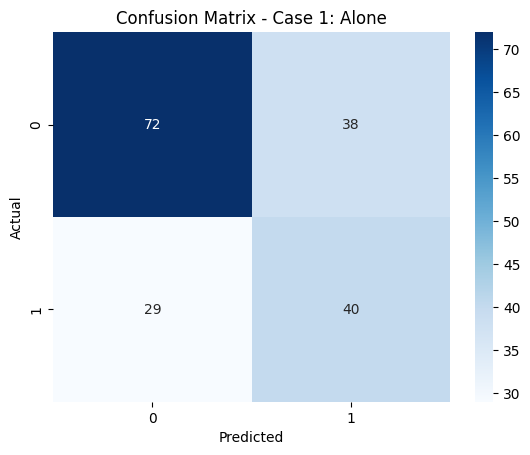

In [23]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

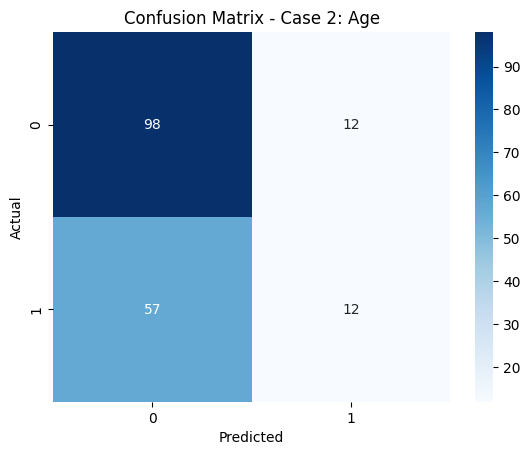

In [24]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

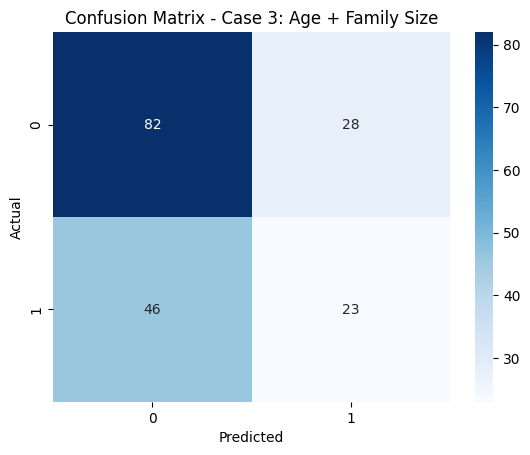

In [25]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

Plot the decision tree model for each case.

Case 1

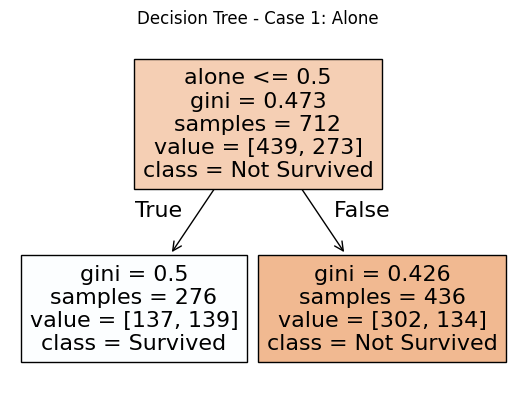

In [26]:
# Plot Decision Tree for Case 1
fig = plt.Figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

Case 2

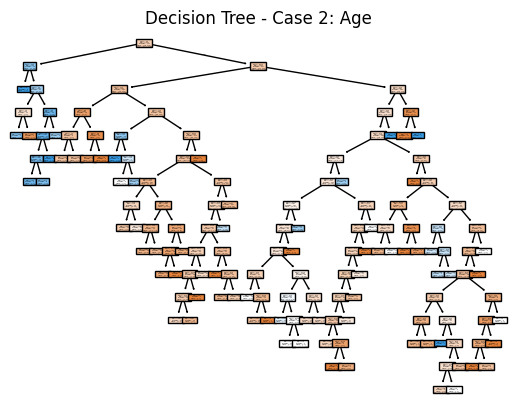

In [27]:
# Plot Decision Tree for Case 2
fig = plt.Figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

Case 3

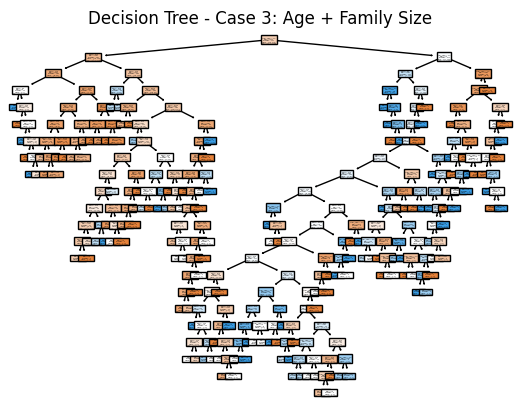

In [28]:
# Plot Decision Tree for Case 3
fig = plt.Figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| Decision Tree | Case 1 | alone | 0.63 | 0.64 | 0.63 | 0.63 | - |
|                   | Case 2 | age | 0.61 | 0.58 | 0.61 | 0.55 | - |
|                   | Case 3 | age + family_size | 0.59 | 0.57 | 0.59 | 0.57 | - |

### Reflection 4:

- How well did the different cases perform? **Case 1 performed best on the test data. Training accurancy was higher on Cases 2 and 3, but test accurancy was lower.**
- Are there any surprising results? **Yes. I expected performancy to improve by adding age and/or family size, but performance decreased overall with Cases 2 and 3.**
- Which inputs worked better? **The single simple input of 'alone' worked the best. The more features that were added seems to have decreased performance.**

## Section 5. Compare Alternative Models (SVC, NN)

SVC

**RBF Kernel (default) - same as calling SVC()**  
svc_model = SVC(kernel='rbf')  
svc_model.fit(X_train, y_train)

**Linear Kernel**  
svc_model = SVC(kernel='linear')  
svc_model.fit(X_train, y_train)

**Polynomial Kernel (e.g., with degree=3)**  
svc_model = SVC(kernel='poly', degree=3)  
svc_model.fit(X_train, y_train)

**Sigmoid Kernel**  
svc_model = SVC(kernel='sigmoid')  
svc_model.fit(X_train, y_train)

### 5.1 Train and Evaluate Model (SVC)

First, train an SVC model using the default kernel.

Case 1

In [30]:
# Case 1: SVC using 'alone'

svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print(classification_report(y1_test, y1_svc_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



Case 2

In [31]:
# Case 2: SVC using 'age'

svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print(classification_report(y2_test, y2_svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



Case 3

In [32]:
# Case 3: SVC using 'age' and 'family_size'

svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print(classification_report(y3_test, y3_svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

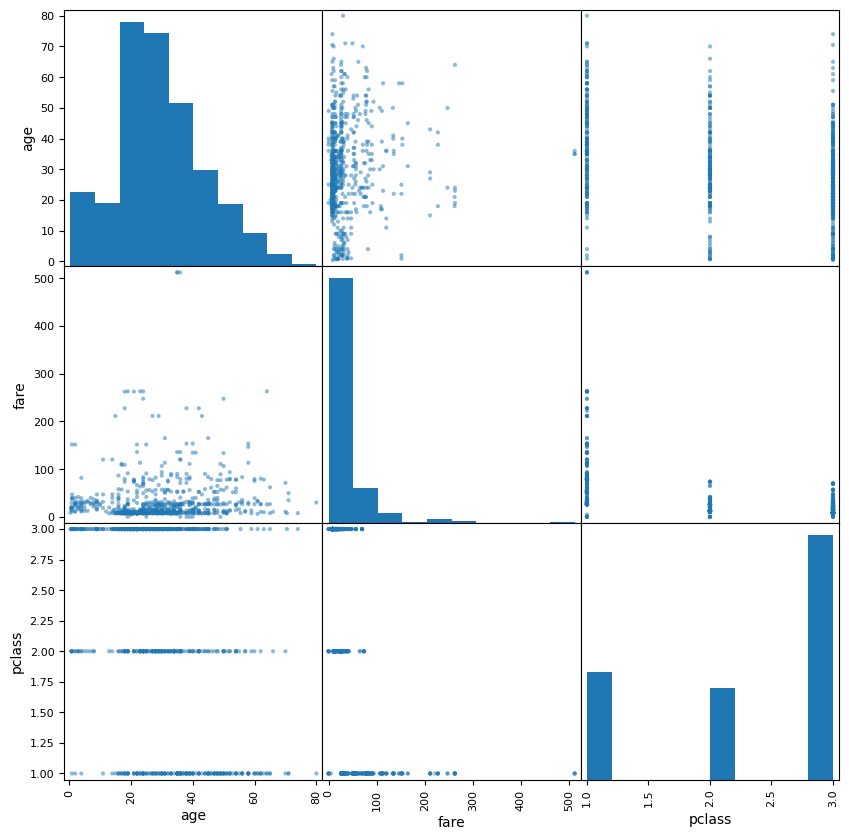

In [8]:
attributes = ["age", "fare", "pclass"]
scatter_matrix(titanic[attributes], figsize=(10, 10))

Create a scatter plot of age vs fare, colored by gender:

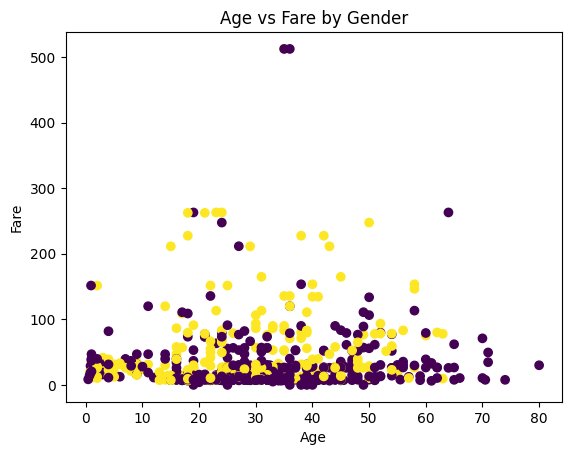

In [9]:
plt.scatter(
    titanic["age"], titanic["fare"], c=titanic["sex"].apply(lambda x: 0 if x == "male" else 1)
)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Gender")
plt.show()

Create a histogram of age:

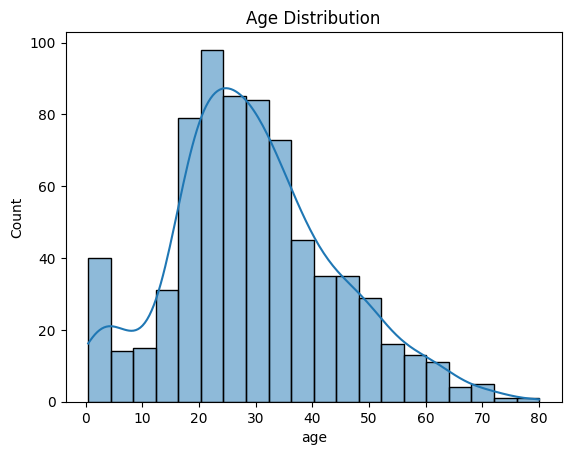

In [10]:
sns.histplot(titanic["age"], kde=True)
plt.title("Age Distribution")
plt.show()

Create a count plot for class and survival:

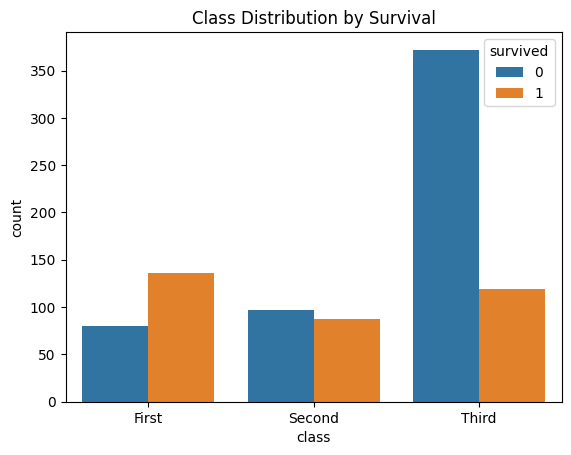

In [11]:
sns.countplot(x="class", hue="survived", data=titanic)
plt.title("Class Distribution by Survival")
plt.show()

### Reflect 2.1

1) What patterns or anomalies do you notice? **Most passengers are between the ages of 20-40, most passengers paid a fare of 100 or less, and most Third Class passengers did not survive. Second Class survivability was nearly 50%, and a higher percentage of First Class passengers surived then did not survive.**

2) Do any features stand out as potential predictors? **Higher fares correlate with First Class passengers, who had a higher survival rate. Females and children likely had a higher survival rate since females and children were allowed to board lifeboats first. Since the ship filled with water from the bottom up, lower fare passengers (as shown in the plot) had a higher chance to not survive since their berthing areas were in the lower part of the ship.**

3) Are there any visible class inbalances? **Most passengers paid less than 100, which corresponds to Third Class passengers. We know from historical data not presented here that their berthing areas were near the bottom of the ship, and thus had a much lower survival rate.**

### 2.2 Handle Missing Values and Clean Data

Age was missing values. We can impute missing values for age using the media:

In [12]:
titanic["age"].fillna(titanic["age"].median(), inplace=True)

C:\Users\james\AppData\Local\Temp\ipykernel_6080\3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

In [13]:
titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace=True)

C:\Users\james\AppData\Local\Temp\ipykernel_6080\3403561138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


### 2.3 Feature Engineering

Create a new feature: Family size

In [14]:
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

Convert categorical data to numeric:

In [15]:
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

Create a binary feature for 'alone':

In [16]:
titanic["alone"] = titanic["alone"].astype(int)

### Reflection 2.3

1) Why might family size be a useful feature for predicting survival? **Women and children were allowed to board the lifeboats first, and IIRC, single men were nearly the last group allowed to board the lifeboats.**

2) Why convert categorical data to numeric? **Linear regression and other types of machine learning models cannot handle string labels and need numeric inputs to calculate sums, averages, probabilities, or splits.**

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

- Select two or more input feature (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
  - Classification: Categorical target variable (e.g., gender, species).
  - Justify your selection with reasoning.

For classification, we'll use **survived** as the target variable.

Input features: age, fare, pclass, family_size
Target: survived

### 3.2 Define X and y

- Assign input features to X
- Assign target variable to y (as applicable)

In [17]:
X = titanic[["age", "fare", "pclass", "sex", "family_size"]]
y = titanic["survived"]

## Reflection 3

1) Why are these features selected? **These features are numerical or have been encoded as numeric, which lends themselves to being interpreted by machine learning models. They are also relevant to survival.**

2) Are there any features that are likely to be highly predictive of survival? **Fare, Sex, age, and family_size are likely to be highly predictive as women and children were given priority for boarding lifeboats. Also, as we have seen with the plots, cheaper fares had an extremely low survival rate.**

## Section 4. Splitting

Split the data into training and test sets using train_split first and StratifiedShuffleSplit second. Compare.

### 4.1 Basic Train/Test Split

In [18]:
full_data = pd.concat([X, y], axis=1)
train_set, test_set = train_test_split(full_data, test_size=0.2, random_state=123)
print("Train Size:", len(train_set))
print("Test Size:", len(test_set))

Train Size: 712
Test Size: 179


### 4.2 Stratified Train/Test Split

In [19]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]
print("Train Size:", len(train_set))
print("Test Size:", len(test_set))

Train Size: 712
Test Size: 179


### 4.3 Compare Results

In [20]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set["pclass"].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set["pclass"].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


## Reflection 4

1) Why might stratification improve model performance? **Train/test sets better reflect the true class balance.**

2) How close are the training and test distributions to the original dataset? **Train and test sets are reasonably close to the original dataset, though minor differences exist.**

3) Which split method produced better class balance? **The stratified split is better because it preserves the original distribution in both train and test sets. The basic split is random, so the train/test sets could have slightly distored distributions.**